**Siguientes pasos:**

- Redactar memoria primera vuelta, algoritmo genético, shap, error obtenido, etc
- Análisis de error obtenido
- Interpretación del modelo
- API


**Preguntar a Raúl**
- Me estoy pasando con las explicaciones?
- Estoy siguiendo una estructura correcta en la memoria?
- Hay imágenes en las que a penas se ven las letras, qué puesdo hacer con ellas?
- Referenciar en el texto?

Podría ser interesante enfocar la memoria como un flujo completo de un proyecto de Data Science: 
  - Objetivo
  - Obtención de los datos
  - Limpieza de datos
  - Análisis de datos
  - Refinar los datos
  - Creación de modelos
  - Validación de modelos(Conjunto de test)
  - Evaluar los modelos(Análisis de resultados)
  - (Interfaz de despliegue)
  - Conclusiones
  - Referencia(Barton Poulson Professor, Designer, Data Analytics Expert - Curso LinkedIn)

**Planificación Calendario**
* 27/03 - 18/04 (3 Semanas) -> Análisis y preprocesamiento
* 18/04 - 23/05 (5 Semanas) -> Modelos
* 23/05 - 13/06 (3 Semanas) -> Análisis de resultados
* 13/06 - 20/06 (1 Semana) -> Finiquitar memoria
* 20/06 ENTREGA DEL TFG
* 20/06 - 30/06 (1-2 semanas) -> Preparar presentación
* 30/06 PRESENTACIÓN TFG

# Importar Liberías

In [1]:
import pandas as pd
import numpy as np
import sklearn 
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras import backend as K
import requests
from matplotlib.pyplot import xticks
import pickle
import shap
shap.initjs()

# Importar dataset

In [2]:
df = pd.read_csv('Data/Datasets/PreprocessedDataset.csv', sep=',')

In [3]:
df

Year  Female  Male  Life Expectancy  % Death Cardiovascular  \
0     -1.676227       1     1        -1.811064                1.635334   
1     -1.676227       1     0        -1.700317                1.635334   
2     -1.676227       0     1        -1.915730                1.635334   
3     -1.560489       1     1        -1.744476                1.635334   
4     -1.560489       1     0        -1.632833                1.635334   
...         ...     ...   ...              ...                     ...   
14365  1.558937       1     0        -0.588266                0.762616   
14366  1.558937       0     1        -0.896981                1.023838   
14367  1.674270       1     1        -0.698714                0.855253   
14368  1.674270       1     0        -0.558262                0.734243   
14369  1.674270       0     1        -0.867375                1.023838   

       Low CI Value % Death Cardiovascular  \
0                                 1.175056   
1                                 1.175056   
2                                 1.175056   
3                                 1.175056   
4                                 1.175056   
...                                    ...   
14365                             0.330415   
14366                             0.752210   
14367                             0.479483   
14368                             0.283824   
14369                             0.739296   

       High CI Value % Death Cardiovascular  Suicides Rate  Alcohol Abuse  \
0                                  1.780172      -0.418101      -1.744587   
1                                  1.780172      -0.418101      -1.744587   
2                                  1.780172      -0.418101      -1.744587   
3                                  1.780172      -0.418101      -1.744587   
4                                  1.780172      -0.418101      -1.744587   
...                                     ...            ...            ...   
14365                              0.998941       0.643334      -1.012234   
14366                              1.176218       0.643334       0.517139   
14367                              1.061106       0.643334      -0.362131   
14368                              0.980069       0.643334      -0.362131   
14369                              1.176218       0.643334      -0.362131   

       Poisoning Mortality Rate  Tobacco Prevalence  \
0                      0.654428           -0.106513   
1                      0.654428           -0.106513   
2                      0.654428           -0.106512   
3                      0.654428            0.636754   
4                      0.654428            0.636753   
...                         ...                 ...   
14365                  1.204384           -2.055564   
14366                  1.204384            0.187385   
14367                  1.204384           -0.672013   
14368                  1.204384           -0.672013   
14369                  1.204384           -0.672013   

       % of Births Attended By Skilled Personal  Incidence of Malaria  \
0                                     -1.799759              0.948818   
1                                     -1.799759              0.948818   
2                                     -1.799759              0.948818   
3                                     -1.799759              0.948818   
4                                     -1.799759              0.948818   
...                                         ...                   ...   
14365                                 -0.619398              1.192010   
14366                                 -0.619398              1.192010   
14367                                 -0.045361              1.356772   
14368                                 -0.045361              1.356772   
14369                                 -0.045361              1.356772   

       Incidence of Tuberculosis  Low CI Value Incidence of Tuberculosis  \
0                       0.8383

# Separación de la variable objetivo

In [4]:
X = df.drop(columns=['Life Expectancy'])
y = df['Life Expectancy']

# División en conjunto de entrenamiento y de test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Funciones

In [6]:
# Importamos el dataset con los datos preprocesados pero sin estandarizar
df_filled = pd.read_csv('Data/Datasets/FilledDataset.csv',sep=',')

In [7]:
# Cargamos los scalers para hacer y deshacer las transformaciones
scalerLE = pickle.load(open('Data/Scalers/LE_Scaler.pkl', 'rb'))
scaler_total = pickle.load(open('Data/Scalers/Normal_Features_Scaler.pkl', 'rb'))
power_YJ = pickle.load(open('Data/Scalers/Yeo-Johnson_Scaler.pkl', 'rb'))

In [8]:
#Desestandarizamos la variable objetivo del conjunto de test
y_test_unstandarized = scalerLE.inverse_transform(y_test.values.reshape(-1,1)).flatten()

In [9]:
#Error de entrenamiento y de test según diferentes métricas de medida:
def errorMetrics(y_train_predicted,y_test_predicted):
    y_test_predicted_unstandarized = scalerLE.inverse_transform(y_test_predicted)

    print("\nRMSE Train standarized values: ", str(mean_squared_error(y_train, y_train_predicted, squared = False)))
    print("RMSE Test standarized values: ", str(mean_squared_error(y_test, y_test_predicted, squared = False)))
    print("RMSE Test absolute values: ", str(mean_squared_error(y_test_unstandarized, y_test_predicted_unstandarized, squared = False)))

    print("\nMAE Train standarized values: ", str(mean_absolute_error(y_train, y_train_predicted)))
    print("MAE Test standarized values: ", str(mean_absolute_error(y_test, y_test_predicted)))
    print("MAE Test absolute values: ", str(mean_absolute_error(y_test_unstandarized, y_test_predicted_unstandarized)))

    print("\nR2 Train: ", str(r2_score(y_train, y_train_predicted)))
    print("R2 Test: ", str(r2_score(y_test, y_test_predicted)))

In [10]:
# Función para poder calcular el error R2 al entrenar la red de neuronas
def r2_score_metric(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
#Cortesía de https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/

In [11]:
#Función para desestandarizar el error y obtenerlo en años de vida
def errorsUnstandarized(y_test_predicted):
    y_test_predicted_unstandarized = scalerLE.inverse_transform(y_test_predicted)
    rmse = mean_squared_error(y_test_unstandarized, y_test_predicted_unstandarized, squared = False)
    mae = mean_absolute_error(y_test_unstandarized, y_test_predicted_unstandarized)
    r2 = r2_score(y_test, y_test_predicted)
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

In [12]:
#Importar Red de Neuronas
NN_model = tf.keras.models.load_model('Data/Models/NN_Model.h5', compile=False)
NN_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['mae', 'mse', r2_score_metric])

# Modelos

## Regresión Lineal

In [13]:
#Entrenamiento
linear = LinearRegression()
linear.fit(X_train, y_train) 

LinearRegression()

In [14]:
print("Regresión Lineal:")
errorMetrics(linear.predict(X_train), linear.predict(X_test))

Regresión Lineal:

RMSE Train standarized values:  0.27293409601150037
RMSE Test standarized values:  0.28089863651790054
RMSE Test absolute values:  2.817950427409114

MAE Train standarized values:  0.19901675054359796
MAE Test standarized values:  0.20302305433329965
MAE Test absolute values:  2.0367094330697024

R2 Train:  0.9247785165850644
R2 Test:  0.9240373819236388


In [15]:
pd.DataFrame({'Feature': X.columns, 'Coef. Reg. Lineal': linear.coef_, 'Abs Coef': abs(linear.coef_), }).sort_values(by='Abs Coef', ascending=False).reset_index(drop=True)[['Feature', 'Coef. Reg. Lineal']].head(10)

Feature  Coef. Reg. Lineal
0                  % Death Cardiovascular          -0.564364
1                % Population $3.20 a day          -0.469647
2                % Population $5.50 a day           0.288774
3                       Diet Calories Fat          -0.278334
4     Low CI Value % Death Cardiovascular           0.278073
5                                    Male          -0.235947
6                                  Female           0.227142
7         Basic Sanization Services Urban           0.210566
8                                    Year           0.202589
9  Low CI Value Incidence of Tuberculosis          -0.199887

In [15]:
#Guardar modelo de regresión lineal
pickle.dump(linear, open('Data/Models/LinearRegression.sav', 'wb'))

In [14]:
# Cargar modelo
linear = pickle.load(open('Data/Models/LinearRegression.sav', 'rb'))

## Elastic-Net

In [13]:
#GridSearch de la regresión Elastic-Net

grid_EN = GridSearchCV(
    ElasticNet(),
    {'alpha': (0,0.00001,0.0001,0.001,0.1,1,10,100,1000),
    'l1_ratio': (0,0.001, 0.01, 0.1, 0.5,0.9,0.99,0.999,1)},
    scoring='neg_root_mean_squared_error',                                 
    cv=5,
    n_jobs=-1,
    verbose = 0,
    return_train_score = True
)

grid_EN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': (0, 1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000),
                         'l1_ratio': (0, 0.001, 0.01, 0.1, 0.5, 0.9, 0.99,
                                      0.999, 1)},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [14]:
resultados = pd.DataFrame(grid_EN.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) 

param_alpha param_l1_ratio  mean_test_score  std_test_score  \
0            0              0        -0.274716        0.010351   
1            0          0.001        -0.274716        0.010351   
2            0           0.01        -0.274716        0.010351   
3            0            0.1        -0.274716        0.010351   
4            0            0.5        -0.274716        0.010351   
..         ...            ...              ...             ...   
53           1              1        -0.995161        0.006526   
52           1          0.999        -0.995161        0.006526   
51           1           0.99        -0.995161        0.006526   
50           1            0.9        -0.995161        0.006526   
80        1000              1        -0.995161        0.006526   

    mean_train_score  std_train_score  
0          -0.272724         0.002579  
1          -0.272724         0.002579  
2          -0.272724         0.002579  
3          -0.272724         0.002579  
4          -0.272724         0.002579  
..               ...              ...  
53         -0.995141         0.001642  
52         -0.995141         0.001642  
51         -0.995141         0.001642  
50         -0.995141         0.001642  
80         -0.995141         0.001642  

[81 rows x 6 columns]

In [15]:
errorMetrics(grid_EN.predict(X_train), grid_EN.predict(X_test))


RMSE Train standarized values:  0.27295391839303124
RMSE Test standarized values:  0.28093435792190197
RMSE Test absolute values:  2.818308781393745

MAE Train standarized values:  0.19902321766075431
MAE Test standarized values:  0.20297547475707312
MAE Test absolute values:  2.0362321189437758

R2 Train:  0.92476758996863
R2 Test:  0.9240180606201395


## KNN

In [16]:
#GridSearch de la regresión KNN 
grid_KNN = GridSearchCV(
    KNeighborsRegressor(),
    {'n_neighbors': (2,3,4,5,10),
     'weights': ('uniform', 'distance')},
     scoring='neg_root_mean_squared_error',                              
     cv=5,
     n_jobs=-1,
     return_train_score = True
)
grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': (2, 3, 4, 5, 10),
                         'weights': ('uniform', 'distance')},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [17]:
resultados = pd.DataFrame(grid_KNN.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

param_n_neighbors param_weights  mean_test_score  std_test_score  \
5                 4      distance        -0.159424        0.003600   
3                 3      distance        -0.160674        0.003847   
7                 5      distance        -0.160811        0.003698   
2                 3       uniform        -0.162413        0.004091   
4                 4       uniform        -0.162871        0.003707   
6                 5       uniform        -0.165702        0.003858   
1                 2      distance        -0.169439        0.003562   
0                 2       uniform        -0.172268        0.003450   
9                10      distance        -0.174113        0.004463   
8                10       uniform        -0.185672        0.004439   

   mean_train_score  std_train_score  
5               NaN              NaN  
3     -1.580493e-08     2.836588e-10  
7               NaN              NaN  
2     -1.156815e-01     7.887519e-04  
4               NaN              NaN  
6               NaN              NaN  
1               NaN              NaN  
0               NaN              NaN  
9               NaN              NaN  
8               NaN              NaN

In [18]:
errorMetrics(grid_KNN.predict(X_train), grid_KNN.predict(X_test))


RMSE Train standarized values:  2.0150320850654984e-08
RMSE Test standarized values:  0.15365386572641682
RMSE Test absolute values:  1.5414420730704625

MAE Train standarized values:  5.541646514767205e-09
MAE Test standarized values:  0.1038395410763341
MAE Test absolute values:  1.0417091474182887

R2 Train:  0.9999999999999996
R2 Test:  0.9772706171366786


## Random Forrest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=100, n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
errorMetrics(rf.predict(X_train), rf.predict(X_test))


RMSE Train standarized values:  0.028154138576077552
RMSE Test standarized values:  0.07062329342960864
RMSE Test absolute values:  0.7084866711067952

MAE Train standarized values:  0.017202013530308157
MAE Test standarized values:  0.04537513387295614
MAE Test absolute values:  0.4551993540306637

R2 Train:  0.9991995931516742
R2 Test:  0.9951982826157288


Se ha probado con más árboles y no mejora

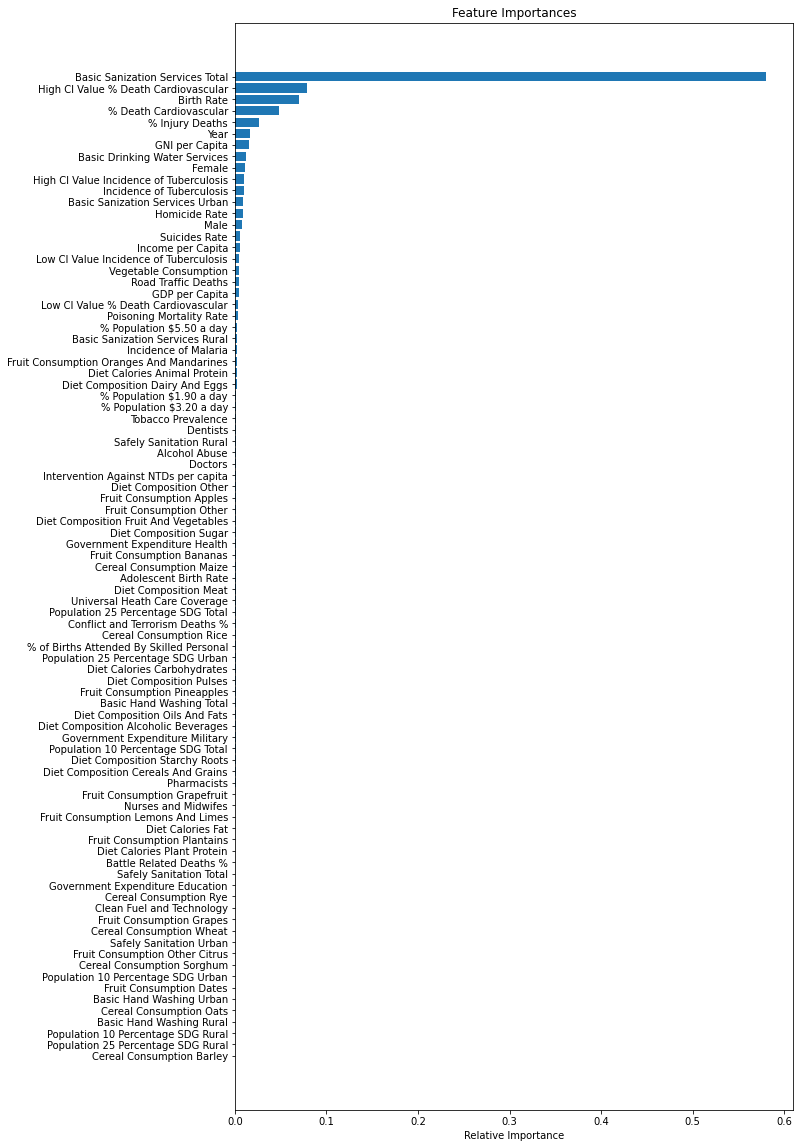

In [ ]:
# plotting feature importances
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
orderedFeaturesRF = orderedFeatures[::-1]

## Red de Neuronas

In [ ]:
NN_model = keras.Sequential([layers.Dense(350, activation=tf.nn.relu, input_shape=(len(X_train.keys()),)),
                          layers.Dense(350, activation=tf.nn.relu),
                          layers.Dense(1)]) #Activación linear
                         
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

NN_model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse', r2_score_metric])

In [ ]:
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 350)               30800     
_________________________________________________________________
dense_1 (Dense)              (None, 350)               122850    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 351       
Total params: 154,001
Trainable params: 154,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class PrintEpochMetrics(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if (epoch%20 == 0):
            print(logs)

In [ ]:
#Early stop: Para cuando el valor de validación empieza a empeorar respectp al de entrenamiento
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

hist = NN_model.fit(X_train, y_train, epochs=1000, verbose=0, validation_split=0.3, callbacks=[early_stop, PrintEpochMetrics()])

{'loss': 0.13501733541488647, 'mae': 0.2518026530742645, 'mse': 0.13501733541488647, 'r2_score_metric': 0.8595440983772278, 'val_loss': 0.05408341810107231, 'val_mae': 0.1688615083694458, 'val_mse': 0.05408341810107231, 'val_r2_score_metric': 0.9412819743156433}
{'loss': 0.0026390133425593376, 'mae': 0.0377783440053463, 'mse': 0.0026390133425593376, 'r2_score_metric': 0.997202455997467, 'val_loss': 0.0052178045734763145, 'val_mae': 0.050376635044813156, 'val_mse': 0.0052178045734763145, 'val_r2_score_metric': 0.9941689968109131}
{'loss': 0.0009555236320011318, 'mae': 0.023001713678240776, 'mse': 0.0009555236320011318, 'r2_score_metric': 0.9989743232727051, 'val_loss': 0.003706514835357666, 'val_mae': 0.04129207134246826, 'val_mse': 0.003706514835357666, 'val_r2_score_metric': 0.9959049820899963}
{'loss': 0.0007666382589377463, 'mae': 0.020987924188375473, 'mse': 0.0007666382589377463, 'r2_score_metric': 0.9991560578346252, 'val_loss': 0.003095831722021103, 'val_mae': 0.0383965335786342

In [ ]:
#Guardamos el modelo
NN_model.save('Data/Models/NN_Model.h5')

In [ ]:
pd.DataFrame(hist.history)

loss       mae       mse  r2_score_metric  val_loss   val_mae  \
0    0.135017  0.251803  0.135017         0.859544  0.054083  0.168862   
1    0.041083  0.144036  0.041083         0.955654  0.031154  0.126510   
2    0.025279  0.112564  0.025279         0.973002  0.022892  0.106973   
3    0.017990  0.095494  0.017990         0.980415  0.018893  0.097480   
4    0.013963  0.084505  0.013963         0.984778  0.015467  0.088168   
..        ...       ...       ...              ...       ...       ...   
393  0.000213  0.010649  0.000213         0.999768  0.001582  0.025431   
394  0.000209  0.010207  0.000209         0.999776  0.001738  0.026674   
395  0.000266  0.011885  0.000266         0.999717  0.001794  0.028185   
396  0.000190  0.010040  0.000190         0.999792  0.001605  0.026258   
397  0.000166  0.009080  0.000166         0.999828  0.001798  0.027793   

      val_mse  val_r2_score_metric  
0    0.054083             0.941282  
1    0.031154             0.965851  
2    0.022892             0.974691  
3    0.018893             0.979104  
4    0.015467             0.982906  
..        ...                  ...  
393  0.001582             0.998207  
394  0.001738             0.998059  
395  0.001794             0.997998  
396  0.001605             0.998183  
397  0.001798             0.998000  

[398 rows x 8 columns]

In [ ]:
def plotHistory(history):
    history = pd.DataFrame(hist.history)
    history['epoch'] = hist.epoch 

    plt.figure(figsize=(12,6))
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Squared Error(RMSE)')
    plt.plot(history['epoch'], (history['mse'] ** 1/2), label='Train Error')
    plt.plot(history['epoch'], (history['val_mse'] ** 1/2), label='Validation Error')
    plt.legend()

    plt.figure(figsize=(12,6))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error(MAE)')
    plt.plot(history['epoch'], history['mae'], label='Train Error')
    plt.plot(history['epoch'], history['val_mae'], label='Validation Error')
    plt.legend()

    plt.figure(figsize=(12,6))
    plt.xlabel('Epoch')
    plt.ylabel('Coefficient of Determination R2')
    plt.plot(history['epoch'], history['r2_score_metric'], label='Train Error')
    plt.plot(history['epoch'], history['val_r2_score_metric'], label='Validation Error')
    plt.legend()

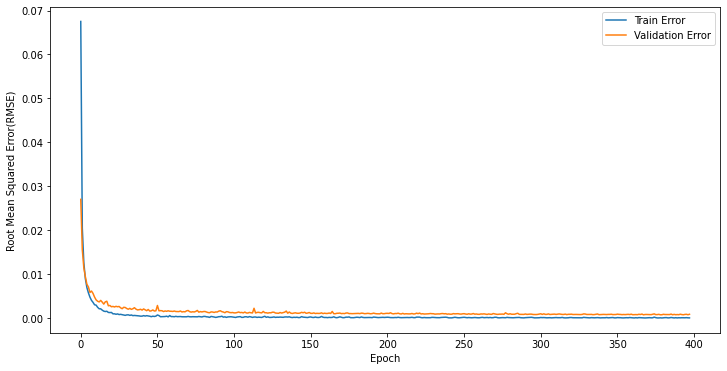

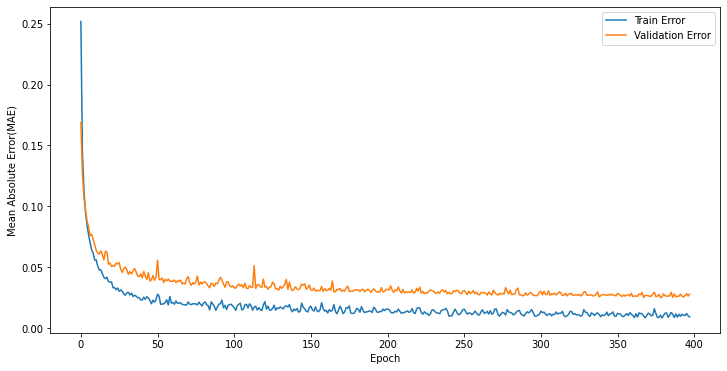

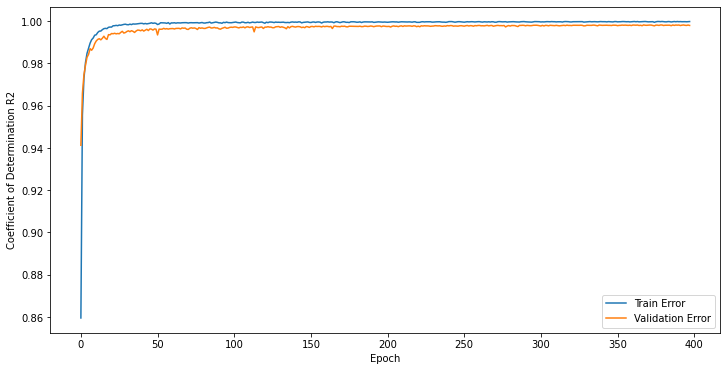

In [ ]:
plotHistory(hist)

In [ ]:
print('Red de Neuronas:')
errorMetrics(NN_model.predict(X_train).flatten(),NN_model.predict(X_test).flatten())

Red de Neuronas:

RMSE Train standarized values:  0.027674162682268386
RMSE Test standarized values:  0.04694564369527847
RMSE Test absolute values:  0.4709545372392034

MAE Train standarized values:  0.0177312895160565
MAE Test standarized values:  0.029433016272691227
MAE Test absolute values:  0.2952694045818755

R2 Train:  0.9992266514292347
R2 Test:  0.9978782644228321


# Análisis de error

In [121]:
#Predicción del conjunto de test por la red neuronal en años de vida
y_predicted_unstandarized = scalerLE.inverse_transform(NN_model.predict(X_test).flatten())

In [122]:
real_vs_predicted = X_test.copy()
real_vs_predicted['Life Expectancy'] = y_test.values
real_vs_predicted['Life Expectancy Predicted'] = NN_model.predict(X_test).flatten()
real_vs_predicted.reset_index(drop=True, inplace=True)

In [123]:
real_vs_predicted['Real Value'] = y_test_unstandarized
real_vs_predicted['Prediction'] = y_predicted_unstandarized
real_vs_predicted['Difference'] = y_predicted_unstandarized - y_test_unstandarized
real_vs_predicted['Estimation'] = real_vs_predicted['Difference'].apply(lambda x: 'Underestimation'if(x <= real_vs_predicted['Difference'].quantile(0.025))
                                                                        else('Overestimation' if(x >= real_vs_predicted['Difference'].quantile(0.975))
                                                                             else 'Middle'))

In [124]:
real_vs_predicted

Year  Female  Male  % Death Cardiovascular  \
0     1.212854       1     0               -0.445464   
1     1.558937       1     0               -0.934257   
2     1.097464       1     0                0.324681   
3    -0.866371       1     0                1.096442   
4     0.173827       1     0                0.475424   
...        ...     ...   ...                     ...   
2869 -0.982021       1     0                0.967185   
2870 -0.288339       1     1                0.900517   
2871 -1.560489       1     1                0.522037   
2872  1.558937       1     0               -0.548158   
2873  0.173827       0     1               -0.918253   

      Low CI Value % Death Cardiovascular  \
0                               -0.258605   
1                               -1.435221   
2                                0.121683   
3                                1.375368   
4                                0.087911   
...                                   ...   
2869                             0.673644   
2870                             1.390072   
2871                             0.130054   
2872                            -0.399637   
2873                            -0.638742   

      High CI Value % Death Cardiovascular  Suicides Rate  Alcohol Abuse  \
0                                -0.464610      -1.666289      -1.250088   
1                                -0.545281      -0.179480      -0.409661   
2                                 0.477490      -0.915139      -1.752206   
3                                 0.768600       1.985445       0.093167   
4                                 0.683583      -0.490683      -1.731726   
...                                    ...            ...            ...   
2869                              1.073406      -0.063219      -0.894043   
2870                              0.477490       1.810695       0.941853   
2871                              0.775308      -0.253786       0.092988   
2872                             -0.494602       1.808392      -0.367069   
2873                             -0.986519       0.362967       0.688361   

      Poisoning Mortality Rate  Tobacco Prevalence  \
0                     0.018492           -0.764835   
1                     0.255670            0.701836   
2                    -0.509496           -2.086058   
3                     1.545133            0.327028   
4                     1.115322           -0.502519   
...                        ...                 ...   
2869                  0.821304            1.837727   
2870                  1.308371            1.074113   
2871                  1.468221           -1.030969   
2872                  1.470627           -1.214147   
2873                  0.143226           -0.309826   

      % of Births Attended By Skilled Personal  Incidence of Malaria  \
0                                    -1.000138             -0.480768   
1                                    -0.074694             -0.859014   
2                                    -0.778276             -0.936017   
3                                     0.696015             -0.936017   
4                                    -1.645051              1.536597   
...                                        ...                   ...   
2869                                 -1.229128              1.186627   
2870                                  0.869217              0.797133   
2871                                 -1.570115              1.483205   
2872                                  0.861860             -0.935632   
2873                                  0.255155             -0.544442   

      Incidence of Tuberculosis  Low CI Value Incidence of Tuberculosis  \
0                     -0.459467                               -0.483771   
1                      0.812954                                0.747427   
2                      0.420013                                0.531902   
3                      0.674345                                0.6108

In [158]:
print('Información sobre el error:\n')

print(f"Error medio por sobreestimación en años es: {real_vs_predicted[real_vs_predicted['Estimation']=='Overestimation']['Difference'].mean()}")
print(f"El mayor error por sobreestimación en años es: {real_vs_predicted[real_vs_predicted['Estimation']=='Overestimation']['Difference'].max()}")
print(f"Cuantil 0.975 para determinar sobreestimación: {real_vs_predicted['Difference'].quantile(0.975)}")

print(f"\nError medio por infraestimación en años es: {real_vs_predicted[real_vs_predicted['Estimation']=='Underestimation']['Difference'].mean()}")
print(f"El mayor error por infraestimación en años es: {real_vs_predicted[real_vs_predicted['Estimation']=='Underestimation']['Difference'].min()}")
print(f"Cuantil 0.025 para determinar infraestimación: {real_vs_predicted['Difference'].quantile(0.025)}")

Información sobre el error:

Error medio por sobreestimación en años es: 1.276016361448499
El mayor error por sobreestimación en años es: 3.721795928955075
Cuantil 0.975 para determinar sobreestimación: 0.7938879089355428

Error medio por infraestimación en años es: -1.4538964108361148
El mayor error por infraestimación en años es: -7.314390991210942
Cuantil 0.025 para determinar infraestimación: -0.8443501708984392


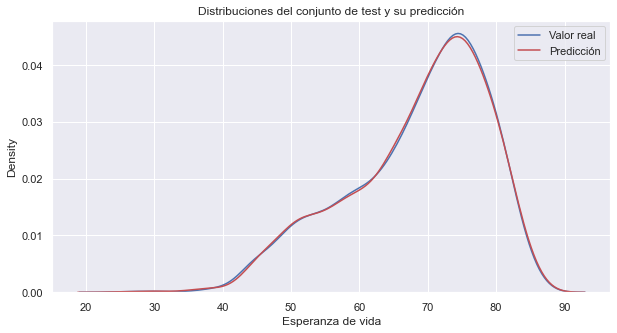

In [163]:
# Distribución de la variable objetivo real y calculada
plt.figure(figsize=(10,5))
sns.distplot(real_vs_predicted['Real Value'], color='b', hist=False, label='Valor real')
sns.distplot(real_vs_predicted['Prediction'], color='r', hist=False, label='Predicción')
plt.legend()
plt.xlabel('Esperanza de vida')
_ = plt.title('Distribuciones del conjunto de test y su predicción')

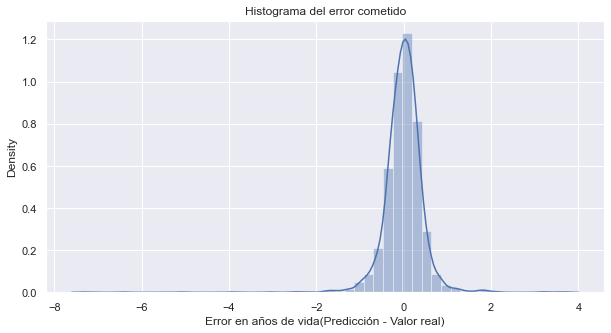

In [127]:
# Distribución del error como la diferencia entre el valor esperado y el obtenido
plt.figure(figsize=(10,5))
sns.distplot(real_vs_predicted['Difference'])
plt.xlabel('Error en años de vida(Predicción - Valor real)')
_ = plt.title('Histograma del error cometido')

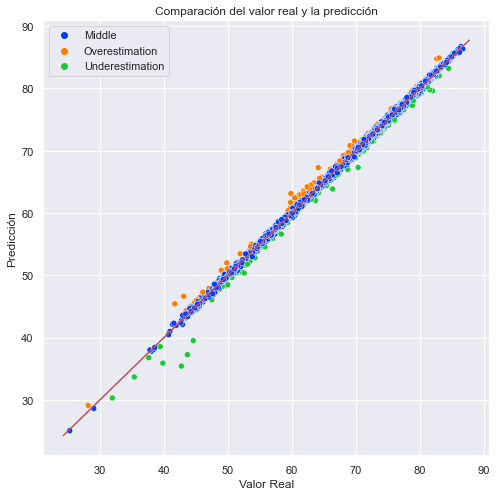

In [136]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Real Value',y='Prediction', data=real_vs_predicted, hue='Estimation', palette='bright')
plt.plot([y_test_unstandarized.min()-1, y_test_unstandarized.max()+1], [y_test_unstandarized.min()-1, y_test_unstandarized.max()+1], color='r')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.legend()
_ = plt.title('Comparación del valor real y la predicción')

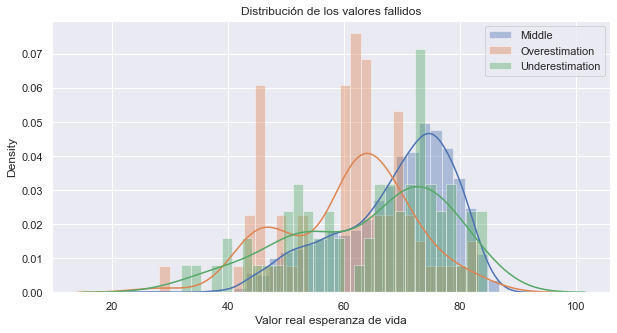

In [137]:
# Distribución del error como la diferencia entre el valor esperado y el obtenido de las predicciones overestimated y underestimated
plt.figure(figsize=(10,5))
sns.distplot(real_vs_predicted[real_vs_predicted['Estimation']=='Middle']['Real Value'], label='Middle')
sns.distplot(real_vs_predicted[real_vs_predicted['Estimation']=='Overestimation']['Real Value'], label='Overestimation', bins=30)
sns.distplot(real_vs_predicted[real_vs_predicted['Estimation']=='Underestimation']['Real Value'], label='Underestimation', bins=30)
plt.legend()
plt.xlabel('Valor real esperanza de vida')
_ = plt.title('Distribución de los valores fallidos')

In [131]:
#Restamos la media de cada feature para ver aquellas que más se alejan de la media en las predicciones sobreestimadas
abs(real_vs_predicted[real_vs_predicted['Estimation']=='Overestimation'].describe().loc['mean'] - real_vs_predicted.describe().loc['mean']).sort_values(ascending=False).drop(index=['Real Value', 'Prediction', 'Difference']).head()

Life Expectancy                        0.774588
Diet Composition Oils And Fats         0.705614
Low CI Value % Death Cardiovascular    0.649977
Life Expectancy Predicted              0.647287
% Death Cardiovascular                 0.639930
Name: mean, dtype: float64

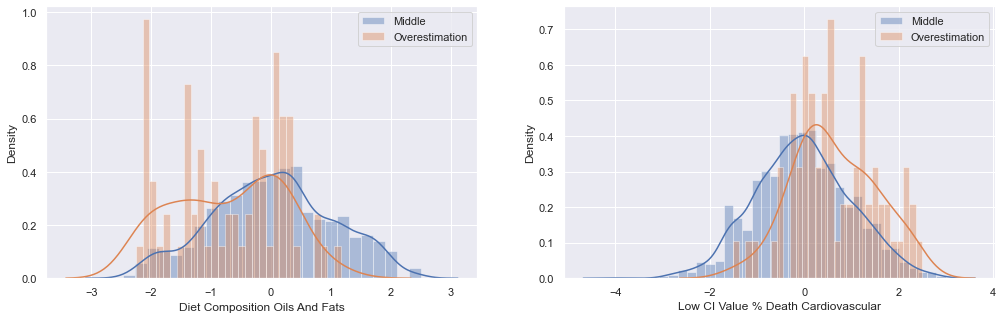

In [138]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
sns.distplot(real_vs_predicted[real_vs_predicted['Estimation']=='Middle']['Diet Composition Oils And Fats'], label='Middle')
sns.distplot(real_vs_predicted[real_vs_predicted['Estimation']=='Overestimation']['Diet Composition Oils And Fats'], label='Overestimation', bins=30)
plt.legend()

plt.subplot(1,2,2)
sns.distplot(real_vs_predicted[real_vs_predicted['Estimation']=='Middle']['Low CI Value % Death Cardiovascular'], label='Middle')
sns.distplot(real_vs_predicted[real_vs_predicted['Estimation']=='Overestimation']['Low CI Value % Death Cardiovascular'], label='Overestimation', bins=30)
plt.legend()

El modelo tiende a sobreestimar cuando el valor a predecir es muy bajo, está en torno a 60-70 o 45-55 años de vida, el valor de Diet Composition Oils And Fats es más bajo de la media y también cuando el valor de (Low CI Value) % Death Cardiovascular es más alto que la media.

In [133]:
#Restamos la media de cada feature para ver aquellas que más se alejan de la media en las predicciones infraestimadas
abs(real_vs_predicted[real_vs_predicted['Estimation']=='Underestimation'].describe().loc['mean'] - real_vs_predicted.describe().loc['mean']).sort_values(ascending=False).drop(index=['Real Value', 'Prediction', 'Difference']).head()

Conflict and Terrorism Deaths %    0.682351
Diet Calories Fat                  0.624516
Diet Composition Oils And Fats     0.606696
Life Expectancy Predicted          0.553234
Basic Hand Washing Total           0.530015
Name: mean, dtype: float64

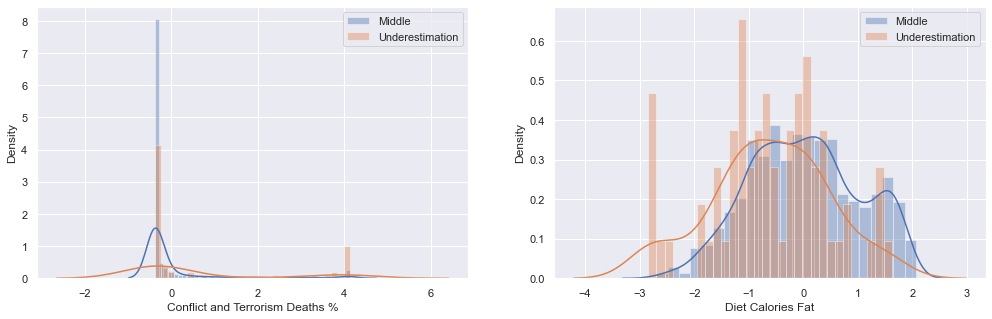

In [139]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
sns.distplot(real_vs_predicted[real_vs_predicted['Estimation']=='Middle']['Conflict and Terrorism Deaths %'], label='Middle')

sns.distplot(real_vs_predicted[real_vs_predicted['Estimation']=='Underestimation']['Conflict and Terrorism Deaths %'], label='Underestimation', bins=30)
plt.legend()

plt.subplot(1,2,2)
sns.distplot(real_vs_predicted[real_vs_predicted['Estimation']=='Middle']['Diet Calories Fat'], label='Middle')
sns.distplot(real_vs_predicted[real_vs_predicted['Estimation']=='Underestimation']['Diet Calories Fat'], label='Underestimation', bins=30)
plt.legend()

El modelo tiende a infraestimar cuando el valor a predecir es muy bajo, cuando Conflict and Terrorism Deaths % es muy alto y cuando Diet Calories fat es muy bajo.

In [ ]:
# Cómo detectar que una predicción puede estar equivocada??


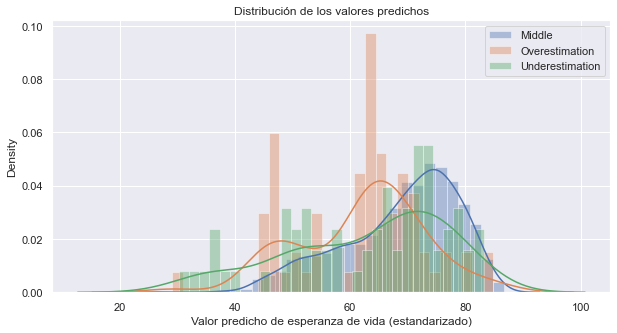

In [142]:
# Distribución del error como la diferencia entre el valor esperado y el obtenido de las predicciones overestimated y underestimated
plt.figure(figsize=(10,5))
sns.distplot(real_vs_predicted[real_vs_predicted['Estimation']=='Middle']['Prediction'], label='Middle')
sns.distplot(real_vs_predicted[real_vs_predicted['Estimation']=='Overestimation']['Prediction'], label='Overestimation', bins=30)
sns.distplot(real_vs_predicted[real_vs_predicted['Estimation']=='Underestimation']['Prediction'], label='Underestimation', bins=30)
plt.legend()
plt.xlabel('Valor predicho de esperanza de vida en años')
_ = plt.title('Distribución de los valores predichos')

La probabilidad de que el valor predicho tenga un error alto de sobreestimación, será mayor si este está entre 60-65 años, 45-50 o valores muy bajos.

La probabilidad de que el valor predicho tenga un error alto de infraestimación, será mayor si este es un valor bajo(hasta 40años)

Podremos asegurar con más certeza de que el valor predicho es correcto cuando la predicción sea mayor de 70 años.

# Análisis de importancia de features

Wrapper Methods: 
Entrenar varias redes con subconjuntos de entradas para ver cuales son las variables que más influyen.
- Ir añadiendo una a una según la correlación y ver cuánto mejora
- Ir quitando una a una a ver cuánto empeora
- Todas las combianaciones posibles(creo que inviable pero quien sabe)
- Ir probando a mano

## Wrapper Methods

### Backward Feature Selection por correlación con la variable objetivo

In [19]:
# Obtenemos las features según el orden de correlación
corrFeatures = list(abs(df.corr().loc['Life Expectancy']).sort_values(ascending=False).index[1:])

In [20]:
X_trainCorr = X_train[corrFeatures].reset_index(drop=True)
X_testCorr = X_test[corrFeatures].reset_index(drop=True)

In [21]:
#Ejecutamos la red de neuronas con 100 epochs eliminando una a una cada feature
errors = []
for i in range(len(corrFeatures), 0,-1):  
    print(f'Red de neuronas de las {i} features más significativas según la correlación con la variable objetivo:')
    model = keras.Sequential([layers.Dense(350, activation=tf.nn.relu, input_shape=(i,)),
                            layers.Dense(350, activation=tf.nn.relu),
                            layers.Dense(1)])
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['mae', 'mse', r2_score_metric])
    hist = model.fit(X_trainCorr[corrFeatures[:i]], y_train, epochs=100, verbose=0, validation_split=0.3)

    errors.append(errorsUnstandarized(model.predict(X_testCorr[corrFeatures[:i]]).flatten()))
    print('Error en años:', errors[-1])

Red de neuronas de las 87 features más significativas según la correlación con la variable objetivo:
Error en años: {'RMSE': 0.6525525479763941, 'MAE': 0.4932565205573371, 'R2': 0.9959265333374723}
Red de neuronas de las 86 features más significativas según la correlación con la variable objetivo:
Error en años: {'RMSE': 0.5451029226894898, 'MAE': 0.35714285038342136, 'R2': 0.9971575675430426}
Red de neuronas de las 85 features más significativas según la correlación con la variable objetivo:
Error en años: {'RMSE': 0.5171864056272878, 'MAE': 0.3487323782435705, 'R2': 0.9974412523286401}
Red de neuronas de las 84 features más significativas según la correlación con la variable objetivo:
Error en años: {'RMSE': 0.5407161239821497, 'MAE': 0.34859352110754566, 'R2': 0.997203132488429}
Red de neuronas de las 83 features más significativas según la correlación con la variable objetivo:
Error en años: {'RMSE': 0.5165453223566622, 'MAE': 0.3487310658815261, 'R2': 0.9974475919693195}
Red de ne

Error en años: {'RMSE': 1.9758116940577963, 'MAE': 1.3043233136128616, 'R2': 0.9626556999354303}
Red de neuronas de las 45 features más significativas según la correlación con la variable objetivo:
Error en años: {'RMSE': 1.9334167134443363, 'MAE': 1.2785160815478531, 'R2': 0.9642411020367307}
Red de neuronas de las 44 features más significativas según la correlación con la variable objetivo:
Error en años: {'RMSE': 2.0026876775558935, 'MAE': 1.3185726624119176, 'R2': 0.961632839220552}
Red de neuronas de las 43 features más significativas según la correlación con la variable objetivo:
Error en años: {'RMSE': 1.9714523233316663, 'MAE': 1.2806425687435528, 'R2': 0.962820307905788}
Red de neuronas de las 42 features más significativas según la correlación con la variable objetivo:
Error en años: {'RMSE': 2.0323051637380565, 'MAE': 1.412500882296738, 'R2': 0.9604896355431845}
Red de neuronas de las 41 features más significativas según la correlación con la variable objetivo:
Error en años

Error en años: {'RMSE': 3.9424258024329815, 'MAE': 3.0722771820408146, 'R2': 0.8513173562764541}
Red de neuronas de las 3 features más significativas según la correlación con la variable objetivo:
Error en años: {'RMSE': 4.684795074344984, 'MAE': 3.657115962836174, 'R2': 0.7900506988350999}
Red de neuronas de las 2 features más significativas según la correlación con la variable objetivo:
Error en años: {'RMSE': 5.219043660575342, 'MAE': 4.067755138718426, 'R2': 0.7394355935139001}
Red de neuronas de las 1 features más significativas según la correlación con la variable objetivo:
Error en años: {'RMSE': 5.679767495859012, 'MAE': 4.409251677001444, 'R2': 0.6914011292511187}


In [22]:
df_errors_wrap_corr = pd.DataFrame(columns = ['RMSE' , 'MAE', 'R2', 'Feature Eliminada'])
df_errors_wrap_corr = df_errors_wrap_corr.append({'RMSE' : errors[0]['RMSE'] , 'MAE' : errors[0]['MAE'], 'R2' : errors[0]['R2'], 'Feature Eliminada': 'Ninguna'} , ignore_index=True)
for i in range(1,len(errors)):
    df_errors_wrap_corr = df_errors_wrap_corr.append({'RMSE' : errors[i]['RMSE'] , 'MAE' : errors[i]['MAE'], 'R2' : errors[i]['R2'], 'Feature Eliminada': corrFeatures[-i]} , ignore_index=True)

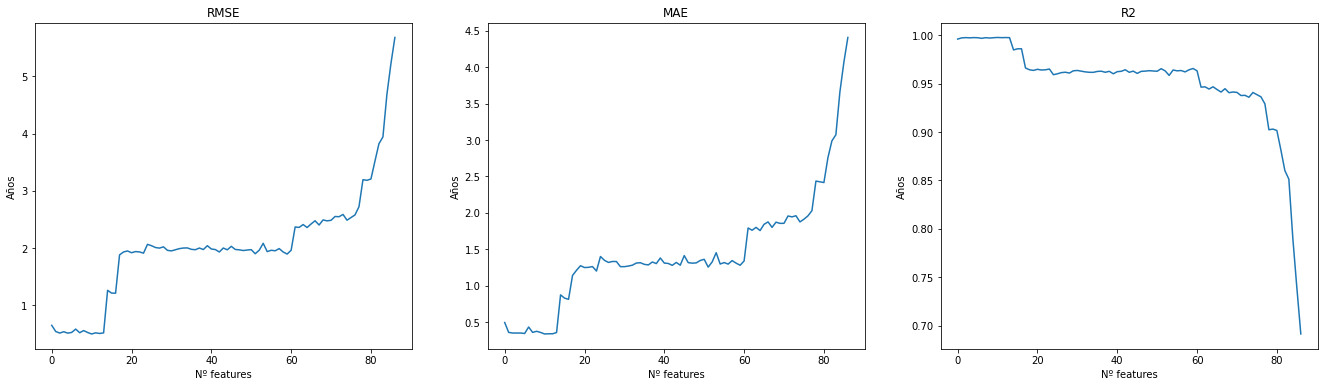

In [23]:
plt.figure(figsize=(23,6))
plt.subplot(1,3,1)
plt.xlabel('Nº features')
plt.ylabel('Años')
plt.title('RMSE')
plt.plot(range(0, len(df_errors_wrap_corr)), df_errors_wrap_corr['RMSE'])

plt.subplot(1,3,2)
plt.xlabel('Nº features')
plt.title('MAE')
plt.ylabel('Años')
plt.plot(range(0, len(df_errors_wrap_corr)), df_errors_wrap_corr['MAE'])

plt.subplot(1,3,3)
plt.xlabel('Nº features')
plt.title('R2')
plt.ylabel('Años')
plt.plot(range(0, len(df_errors_wrap_corr)), df_errors_wrap_corr['R2'])

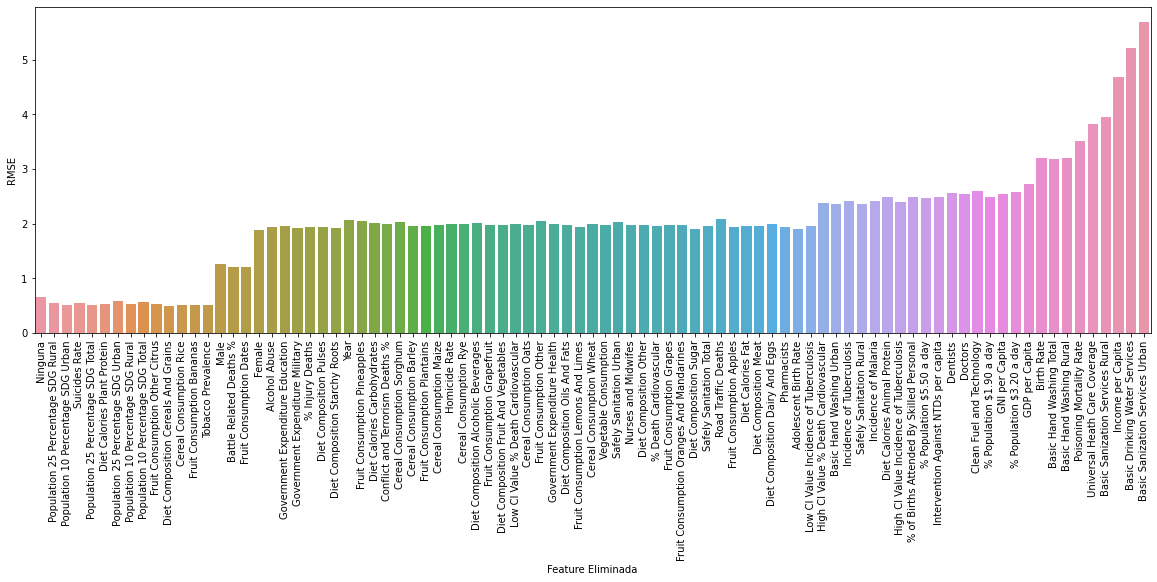

In [24]:
plt.figure(figsize=(20,6))
sns.barplot(x='Feature Eliminada', y='RMSE', data=df_errors_wrap_corr)
_ = xticks(rotation=90)

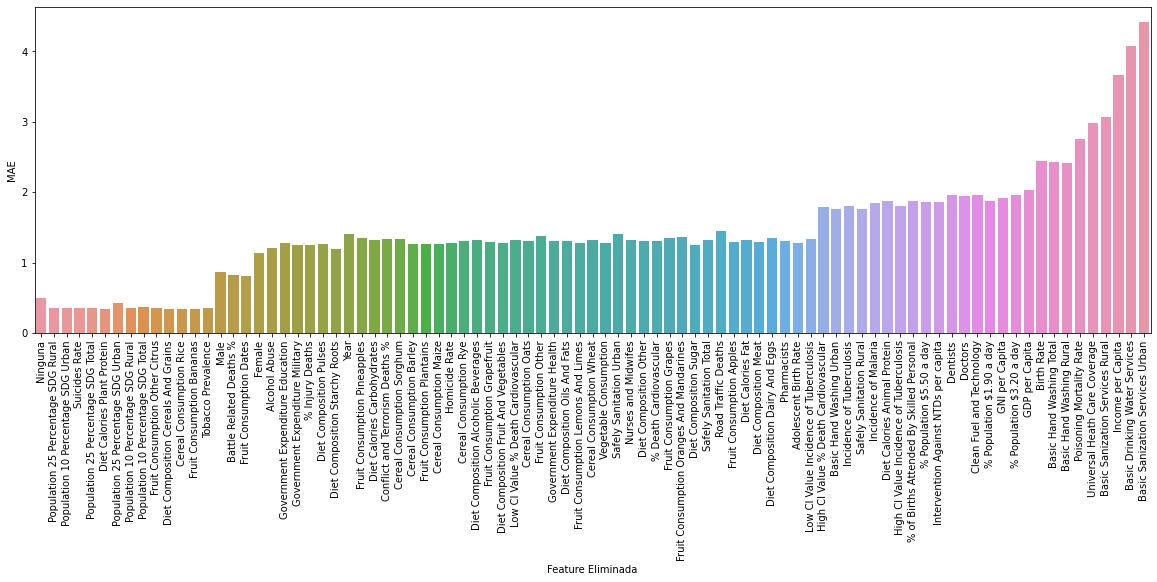

In [25]:
plt.figure(figsize=(20,6))
sns.barplot(x='Feature Eliminada', y='MAE', data=df_errors_wrap_corr)
_ = xticks(rotation=90)

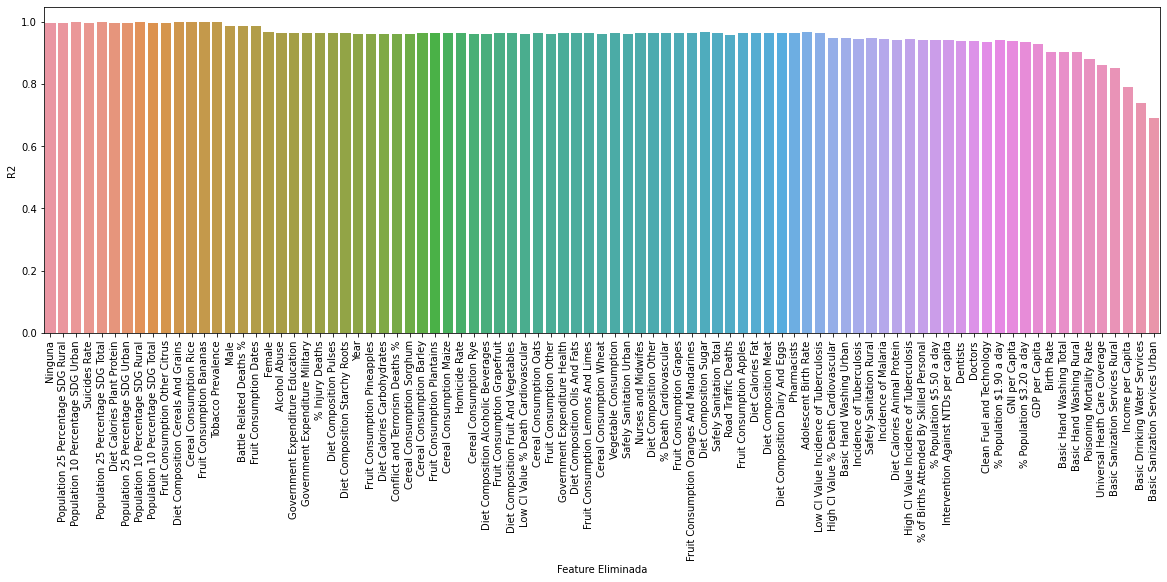

In [26]:
plt.figure(figsize=(20,6))
sns.barplot(x='Feature Eliminada', y='R2', data=df_errors_wrap_corr)
_ = xticks(rotation=90)

### Forward Feature Selection según los resultados de Random Forrest

In [ ]:
# Orden de importancia de features según los resultados de Random Forest
orderedFeatureImportanceRF = [X.columns[i] for i in np.argsort(rf.feature_importances_)][::-1]

In [ ]:
X_trainRF = X_train[orderedFeatureImportanceRF].reset_index(drop=True)
X_testRF = X_test[orderedFeatureImportanceRF].reset_index(drop=True)

In [ ]:
#Ejecutamos la red con 100 epochs añadiendo una a una cada feature
errors = []
for i in range(2,len(orderedFeatureImportanceRF)):  
    print(f'Red de neuronas de las {i} features más significativas según los resultados de Random Forest:')
    model = keras.Sequential([layers.Dense(350, activation=tf.nn.relu, input_shape=(i,)),
                            layers.Dense(350, activation=tf.nn.relu),
                            layers.Dense(1)])
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['mae', 'mse', r2_score_metric])
    hist = model.fit(X_trainRF[orderedFeatureImportanceRF[:i]], y_train, epochs=100, verbose=0, validation_split=0.3)

    errors.append(errorsUnstandarized(model.predict(X_testRF[orderedFeatureImportanceRF[:i]]).flatten()))
    print('Error en años:', errors[-1])

Red de neuronas de las 2 features más significativas según los resultados de Random Forest:
Error en años: {'RMSE': 4.694994787915182, 'MAE': 3.3949679592188318, 'R2': 0.7891355055140244}
Red de neuronas de las 3 features más significativas según los resultados de Random Forest:
Error en años: {'RMSE': 3.735569135819995, 'MAE': 2.656422586089302, 'R2': 0.8665106007862508}
Red de neuronas de las 4 features más significativas según los resultados de Random Forest:
Error en años: {'RMSE': 3.251701324414465, 'MAE': 2.3141160702954258, 'R2': 0.898852649740495}
Red de neuronas de las 5 features más significativas según los resultados de Random Forest:
Error en años: {'RMSE': 2.858652352755144, 'MAE': 2.1130364681660674, 'R2': 0.9218271585772997}
Red de neuronas de las 6 features más significativas según los resultados de Random Forest:
Error en años: {'RMSE': 2.504811177110985, 'MAE': 1.7583082274541144, 'R2': 0.9399817667729988}
Red de neuronas de las 7 features más significativas según los

In [ ]:
df_errors_wrap_rf = pd.DataFrame(columns = ['RMSE' , 'MAE', 'R2', 'Feature Añadida'])
for i in range(len(errors)):
    df_errors_wrap_rf = df_errors_wrap_rf.append({'RMSE' : errors[i]['RMSE'] , 'MAE' : errors[i]['MAE'], 'R2' : errors[i]['R2'], 'Feature Añadida': orderedFeatureImportanceRF[i+1]} , ignore_index=True)

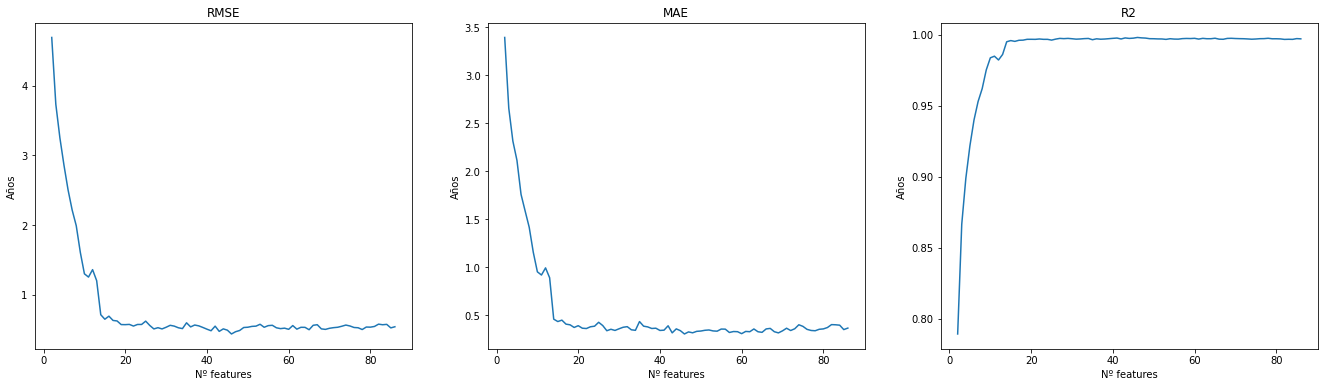

In [ ]:
plt.figure(figsize=(23,6))
plt.subplot(1,3,1)
plt.xlabel('Nº features')
plt.ylabel('Años')
plt.title('RMSE')
plt.plot(range(2, len(orderedFeatureImportanceRF)), df_errors_wrap_rf['RMSE'])

plt.subplot(1,3,2)
plt.xlabel('Nº features')
plt.title('MAE')
plt.ylabel('Años')
plt.plot(range(2, len(orderedFeatureImportanceRF)), df_errors_wrap_rf['MAE'])

plt.subplot(1,3,3)
plt.xlabel('Nº features')
plt.title('R2')
plt.ylabel('Años')
plt.plot(range(2, len(orderedFeatureImportanceRF)), df_errors_wrap_rf['R2'])

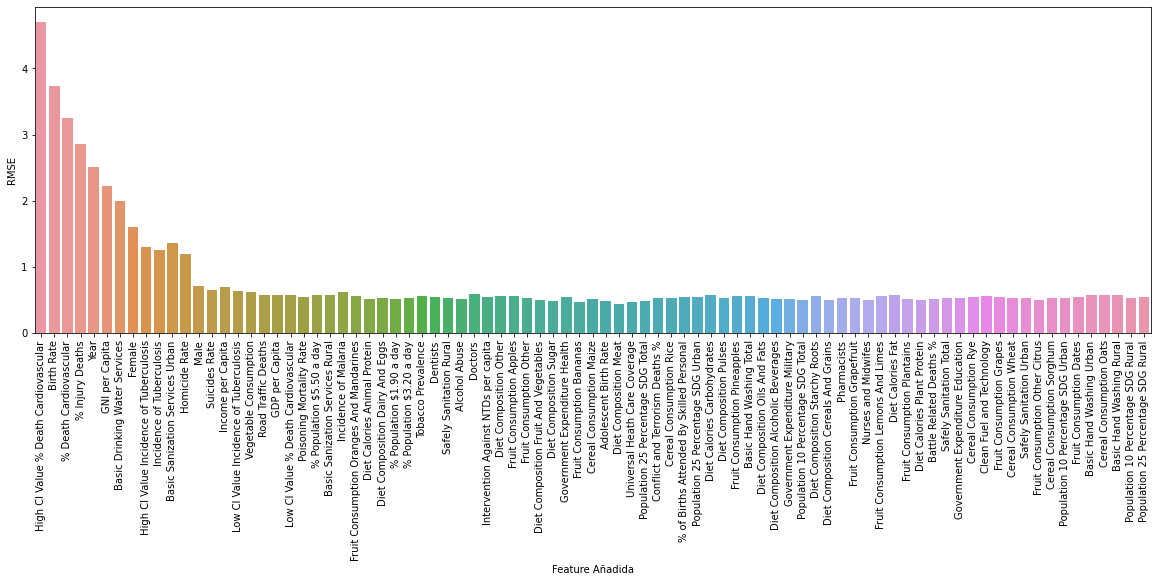

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x='Feature Añadida', y='RMSE', data=df_errors_wrap_rf)
_ = xticks(rotation=90)

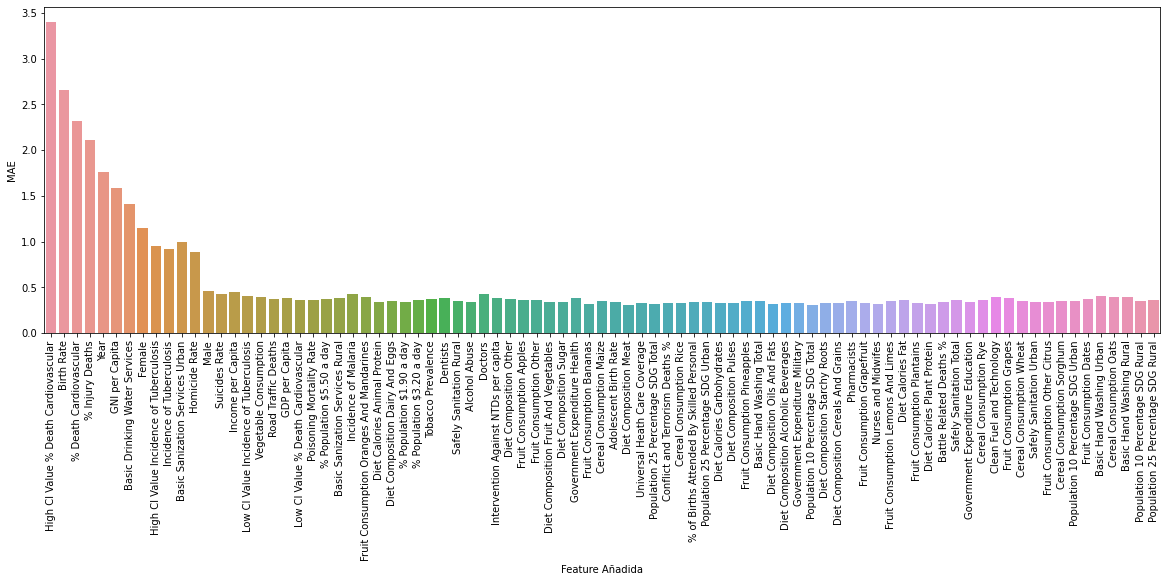

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x='Feature Añadida', y='MAE', data=df_errors_wrap_rf)
_ = xticks(rotation=90)

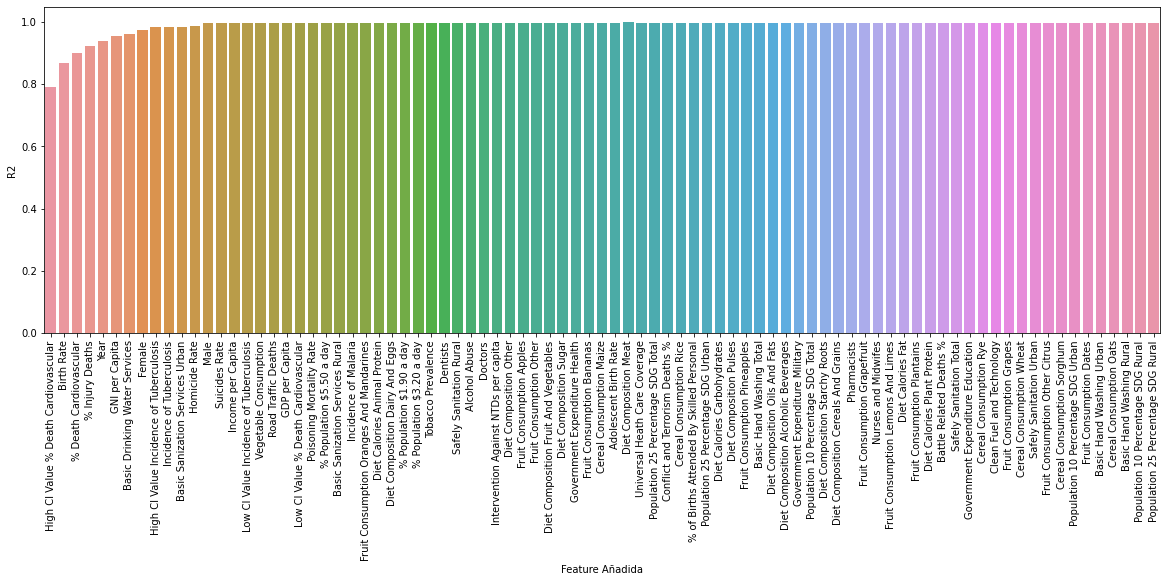

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x='Feature Añadida', y='R2', data=df_errors_wrap_rf)
_ = xticks(rotation=90)

## Algoritmo Genético

## SHAP

In [23]:
X_train_sample = shap.sample(X_train, 500, random_state=21)
X_test_sample = shap.sample(X_test, 500, random_state=21)

In [24]:
explainer = shap.KernelExplainer(NN_model.predict, X_train_sample)

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [78]:
shap_values = explainer.shap_values(X_test_sample)

  0%|          | 0/500 [00:00<?, ?it/s]

In [79]:
# Lo almacenamos en un CSV
np.savetxt('Data/SHAP_values.csv', shap_values[0], delimiter=',')

In [21]:
# Cargamos los shap_values de un CSV
shap_values = []
shap_values.append(np.loadtxt('Data/SHAP_values.csv', delimiter=','))

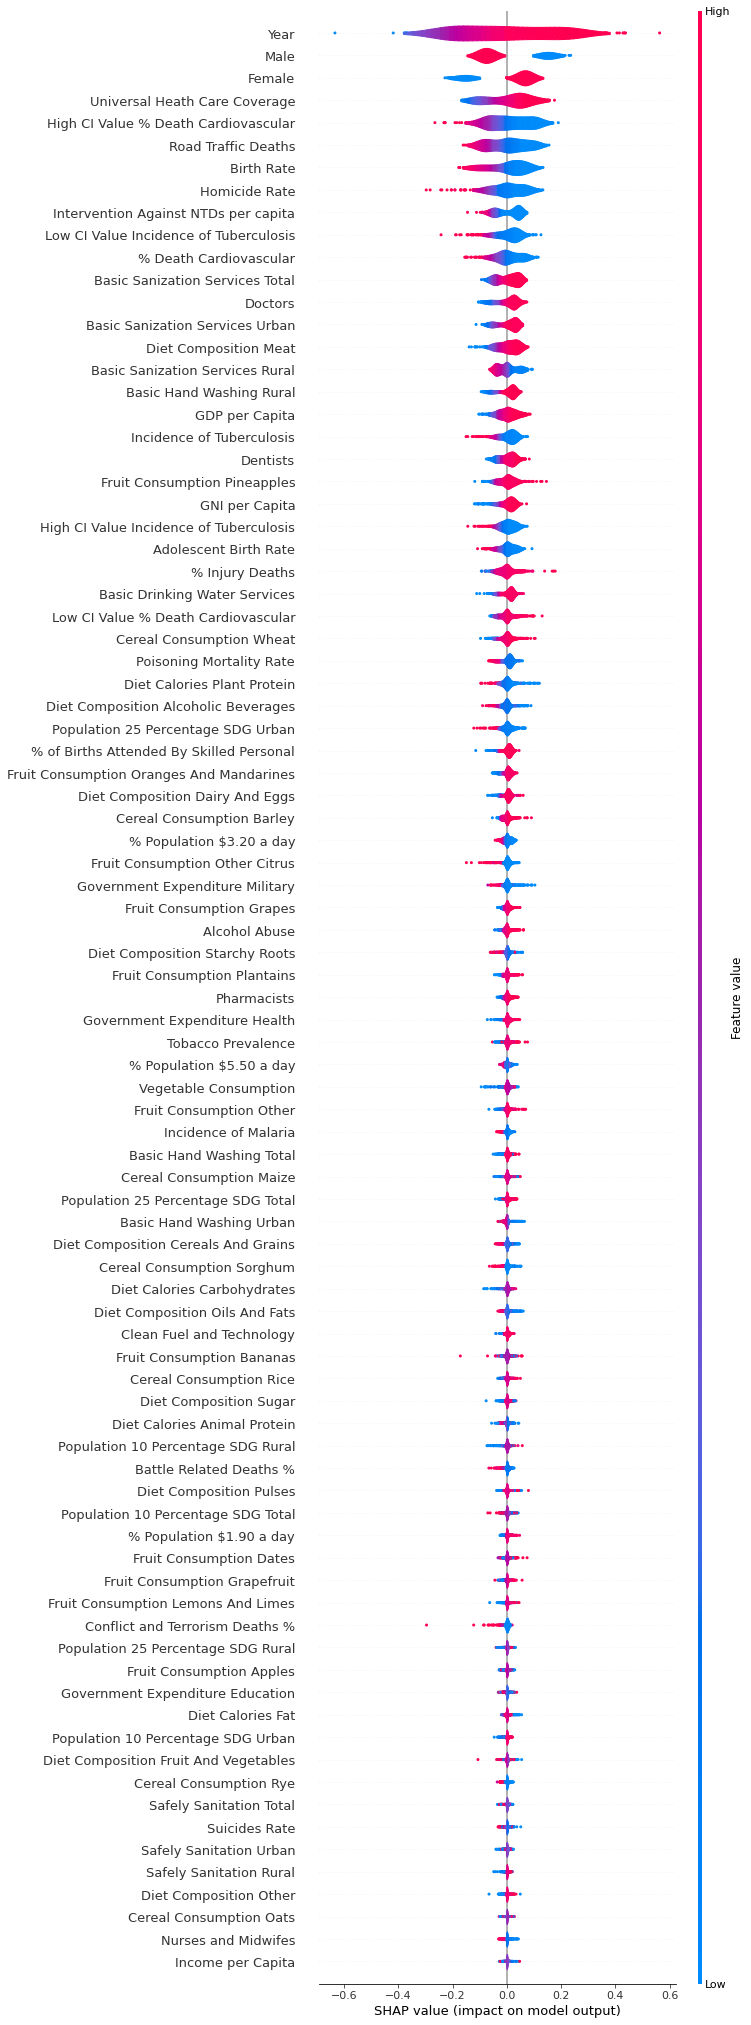

In [25]:
shap.summary_plot(shap_values[0], X_test_sample,max_display=X.shape[1], plot_type="violin")

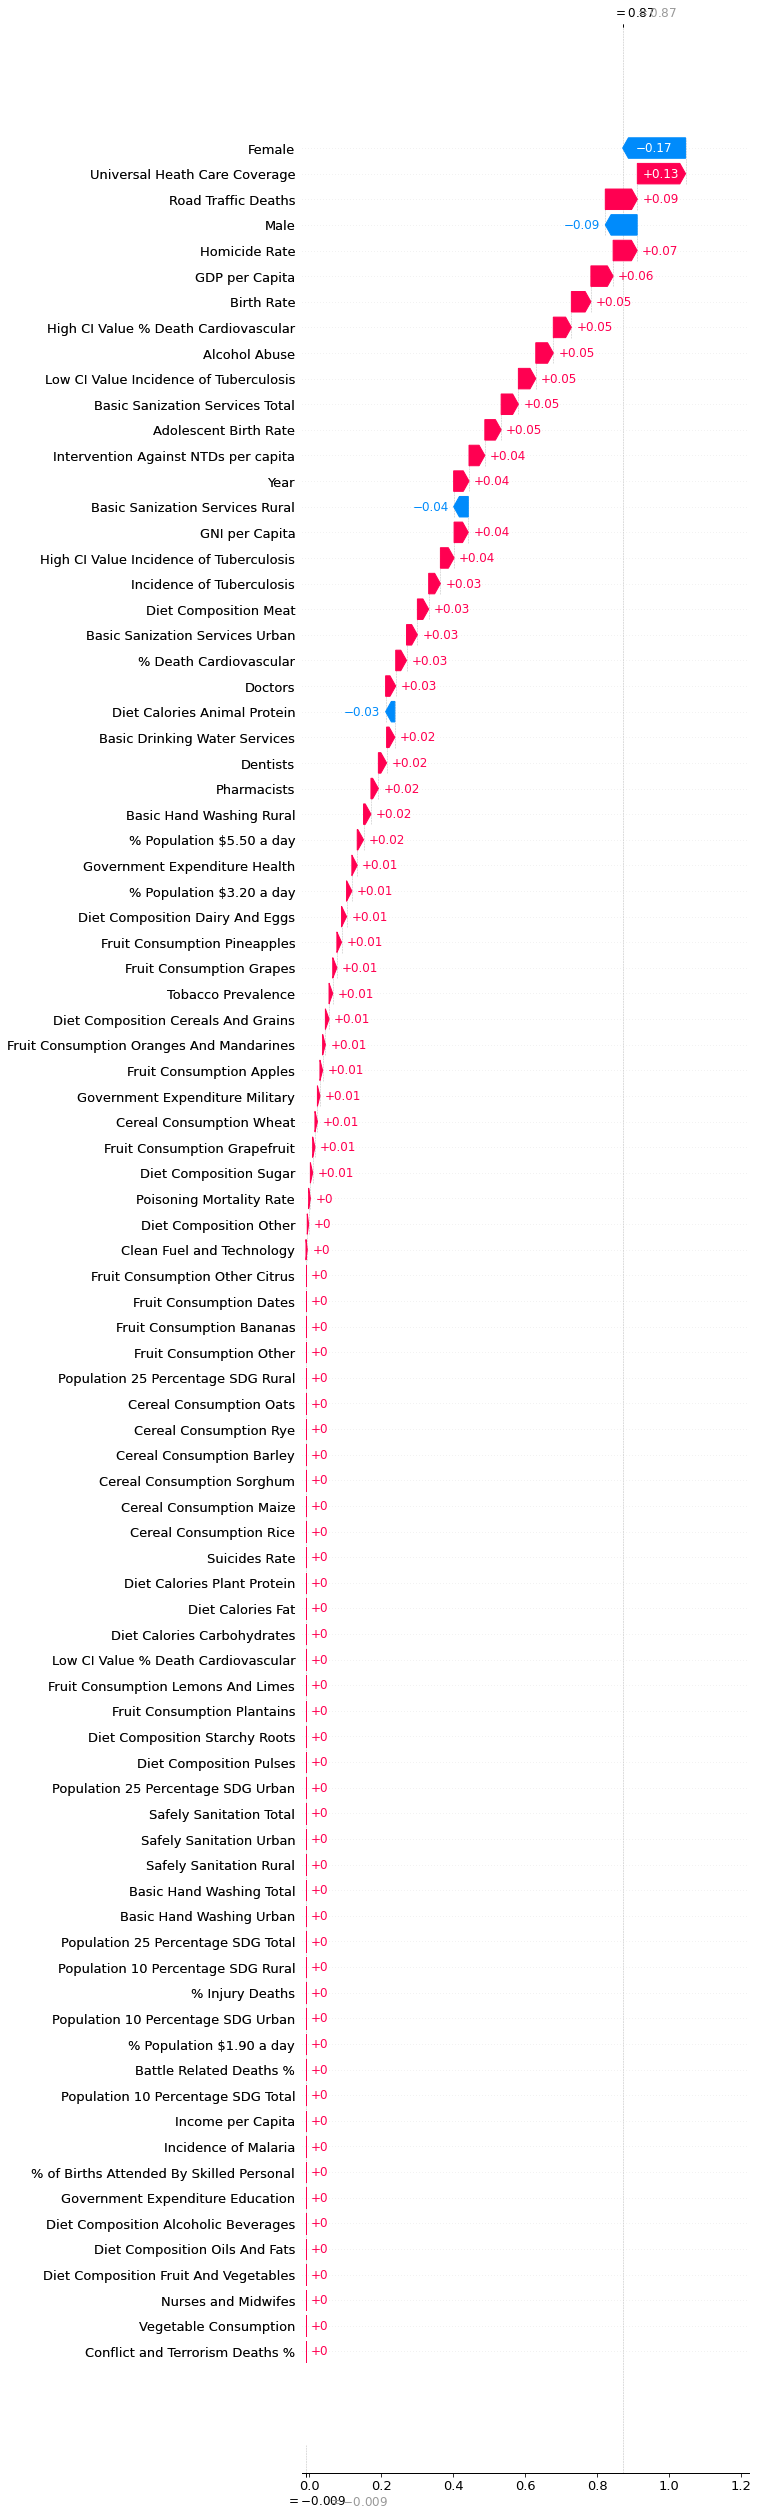

In [44]:
n_sample=5
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][n_sample], feature_names=X.columns, max_display=X.shape[1])

In [45]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")

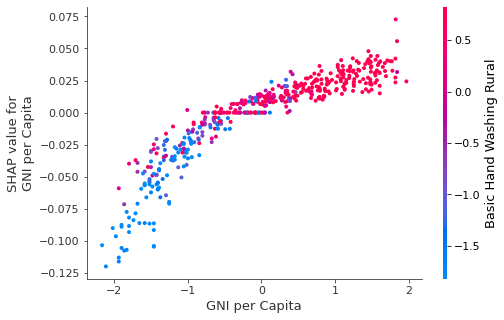

In [50]:
shap.dependence_plot('GNI per Capita', shap_values[0], X_test_sample)

# Reducción de la red de neuronas

In [160]:
# Coger solo las features más importantes

# Predictor

Implementar para tres posibles alternativas:
1. Predictor con todos los indicadores introducidos a mano
2. Predictor con todos los indicadores introducidos por año, pais y género y modificados los que se deseen
3. Predictor con solo los indicadores más relevantes

In [21]:
#Creamos las listas de las features que se van a transformar
columnsYJ = list(df.columns)
columnsYJ.remove('Male')
columnsYJ.remove('Female')
columnsYJ.remove('Life Expectancy')

featuresScale = ['Life Expectancy', '% Death Cardiovascular','Tobacco Prevalence','Road Traffic Deaths','% Injury Deaths', 
            'Government Expenditure Education', 'Government Expenditure Health', 'Diet Composition Cereals And Grains', 
            'Diet Composition Fruit And Vegetables', 'Diet Composition Oils And Fats', 'Diet Calories Plant Protein', 
            'Diet Calories Carbohydrates']

In [22]:
def predictLifeExpectancy(d):
    #Aplicamos las transformaciones
    data = d.copy()
    data.drop(columns=['Country'], inplace=True)
    data.insert(loc=1,column='Female',value=data['Gender'].apply(lambda gender: 0 if gender == 'Male' else 1))
    data.insert(loc=2,column='Male',value=data['Gender'].apply(lambda gender: 0 if gender == 'Female' else 1))
    data.drop(columns=['Gender'], inplace=True)

    data[featuresScale] = scaler_total.transform(data[featuresScale])
    data[columnsYJ] = power_YJ.transform(data[columnsYJ])

    data.drop(columns=['Life Expectancy'], inplace=True)

    #Calculamos la esperanza de vida mediante la Red de Neuronas
    life_expectancy = NN_model.predict(data)
    return scalerLE.inverse_transform(life_expectancy).flatten()[0]

In [23]:
def compareLifeExpectancy(dataOriginal, data):
    print(f"País: {dataOriginal['Country'].iloc[0]}. Año: {int (dataOriginal['Year'].iloc[0])}. Género: {dataOriginal['Gender'].iloc[0]}")
    print(f"Esperanza de vida real: {dataOriginal['Life Expectancy'].iloc[0]}")
    print(f"Esperanza de vida según el predictor: {predictLifeExpectancy(dataOriginal)}")
    print(f"Esperanza de vida tras los cambios: {predictLifeExpectancy(data)}")

In [24]:
# Obtener los datos de un país en un año y un género:
country = 'Spain' #Nombre del país en inglés
year = 1995 # Rango dentro del intervalo [1990, 2019]
gender = 'Both sexes' #Posibles valores: Male, Female y Both sexes

data = df_filled[(df_filled['Country'] == country)&(df_filled['Year'] == year)&(df_filled['Gender'] == gender)]
dataOriginal = data.copy() # Guardamos 
data

Country    Year      Gender  Life Expectancy  % Death Cardiovascular  \
12075   Spain  1995.0  Both sexes           78.175                   11.15   

       Low CI Value % Death Cardiovascular  \
12075                                 9.65   

       High CI Value % Death Cardiovascular  Suicides Rate  Alcohol Abuse  \
12075                                 12.85         7.7068      11.836352   

       Poisoning Mortality Rate  Tobacco Prevalence  \
12075                    0.2149           30.621129   

       % of Births Attended By Skilled Personal  Incidence of Malaria  \
12075                                 99.169153              0.114552   

       Incidence of Tuberculosis  Low CI Value Incidence of Tuberculosis  \
12075                       16.5                                    14.0   

       High CI Value Incidence of Tuberculosis  Road Traffic Deaths  \
12075                                     19.0                  3.9   

       Adolescent Birth Rate  Universal Heath Care Coverage  \
12075                   9.75                           82.0   

       Population 10 Percentage SDG Total  Population 10 Percentage SDG Urban  \
12075                                4.84                                5.46   

       Population 10 Percentage SDG Rural  Population 25 Percentage SDG Total  \
12075                                6.02                               0.875   

       Population 25 Percentage SDG Urban  Population 25 Percentage SDG Rural  \
12075                                1.08                                1.35   

       Doctors  Nurses and Midwifes  Dentists  Pharmacists  \
12075    40.88            30.619326      3.52         9.16   

       Basic Drinking Water Services  Basic Sanization Services Total  \
12075                          100.0                             99.9   

       Basic Sanization Services Urban  Basic Sanization Services Rural  \
12075                            99.88                           99.995   

       Safely Sanitation Total  Safely Sanitation Urban  \
12075                    95.37                   95.505   

       Safely Sanitation Rural  Basic Hand Washing Total  \
12075                     94.9                      87.2   

       Basic Hand Washing Urban  Basic Hand Washing Rural  \
12075                     87.83                     87.06   

       Clean Fuel and Technology  Birth Rate  % Injury Deaths  GDP per Capita  \
12075                       95.0         9.1         3.654691    15471.962717   

       % Population $1.90 a day  % Population $3.20 a day  \
12075                       1.2                       1.7   

       % Population $5.50 a day  Income per Capita  GNI per Capita  \
12075                       4.2       13449.308802         14830.0   

       Homicide Rate  Government Expenditure Education  \
12075        1.02445                          10.63163   

       Government Expenditure Military  Government Expenditure Health  \
12075                         4.210138                       5.373507   

       Diet Composition Alcoholic Beverages  Diet Composition Other  \
12075                                 181.0                    34.0   

       Diet Composition Sugar  Diet Composition Oils And Fats  \
12075                   285.0                           747.0   

       Diet Composition Meat  Diet Composition Dairy And Eggs  \
12075                  499.0                            309.0   

       Diet Composition Fruit And Vegetables  Diet Composition Starchy Roots  \
12075                                  211.0                           156.0   

       Diet Composition Pulses  Diet Composition Cereals And Grains  \
12075                     53.0                                742.0   

       Vegetable Consumption  Fruit Consumption Plantains  \
12075                 149.24                         0.04   

       Fruit Consumption Other  Fruit Consumption Bananas  \
12075                    25.02                       9.55   


In [18]:
#Modificar indicadores
data['% Death Cardiovascular'] -= 1
data['Alcohol Abuse'] -= 1.0
data['Tobacco Prevalence'] -= data['Tobacco Prevalence']*0.10     # Decrementamos en un 10%

In [19]:
predictLifeExpectancy(data)

78.24079

In [20]:
compareLifeExpectancy(dataOriginal, data)

País: Spain. Año: 1995. Género: Both sexes
Esperanza de vida real: 78.175
Esperanza de vida según el predictor: 78.32971954345703
Esperanza de vida tras los cambios: 78.24079132080078
